In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/rys6f1vprily2bg/opencv_bootcamp_assets_NB2.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB2.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

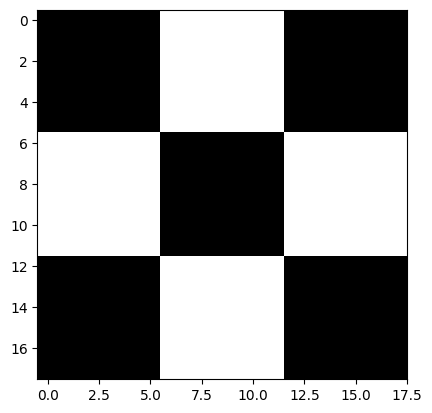

In [4]:
# Read image as gray scale.
cb_img = cv2.imread("checkerboard_18x18.png", 0)

# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap="gray")
print(cb_img)

In [21]:
cb_img_copy = cb_img.copy()
#Modify the Pixels -> if we wanted to modify the pixels we need use basic matrix methods
#now modify pixels in 3rd row 3 and 4th column and 4th row 3 and 4th column
cb_img_copy[2:4,2:4] = 255


print(cb_img_copy)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 255 255   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 255 255   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

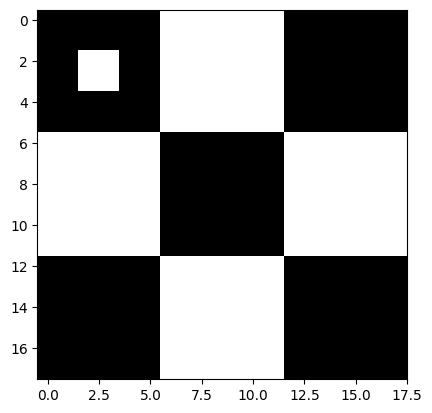

In [18]:
plt.imshow(cb_img_copy, cmap='gray')

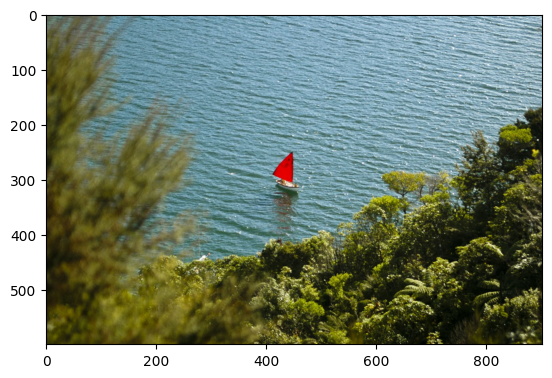

In [25]:
#Cropping The Images
newzealand_img = cv2.imread('New_Zealand_Boat.jpg',cv2.IMREAD_COLOR)[:,:,::-1]
plt.imshow(newzealand_img)

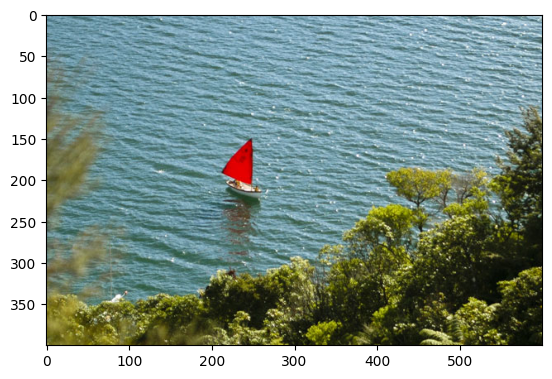

In [28]:
#Cropping using Basic Matrices from length and width
#for Example just crop in these ratios, from 100 to 400 and 200 to 800
cropped_newzealand = newzealand_img[100:500,200:800]
plt.imshow(cropped_newzealand)

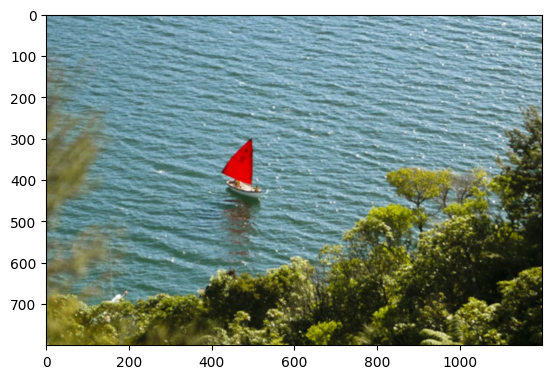

In [32]:
#Now Lets Go to Resizing the Image
#we can resize the image using resize() method
#resize method primarily requires 2 arguments src, dsize
#Optional Arguments fx,fy -> for Scaling for width and height 
#Lets Start Resizing
# Method 1 Scaling -> it increase the resolution using multiplication, dsize must be None if using these
cropped_newzealand_resize = cv2.resize(cropped_newzealand,None,fx=2,fy=2) 
plt.imshow(cropped_newzealand_resize)
#Here it is -> The Dimensions have been increased

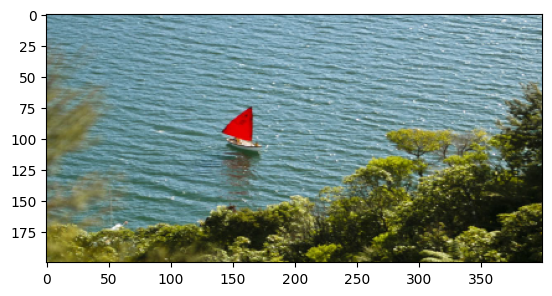

In [59]:
# Now Resize using dimensions
cropped_newzealand_resize = cv2.resize(cropped_newzealand,[400,200],interpolation=cv2.INTER_AREA)
plt.imshow(cropped_newzealand_resize)
#Hola -> Image Has been resized to the specific Dimensions

In [60]:
#This is the most trickiest part.
#Resizing maintaining aspect Ratio
#Lets try to do simple math
shape_crop = cropped_newzealand_resize.shape
print(shape_crop)

(200, 400, 3)


0.5


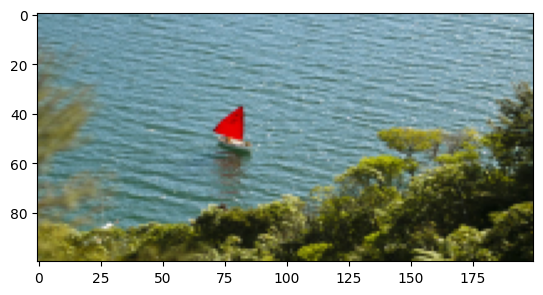

In [63]:
desired_width = 100 #so width must be 100px
#aspect ratio = desired width/original_width*100 -> it returns how much percentage of desired with in Original width of Image
# so that we can multiply with height to make sure the aspect ratio is maintaining.
aspect_ratio = desired_width/shape_crop[0]
print(aspect_ratio) #it means, the desired width is half the size of original_size
#if we wanted to maintain aspect ratio. we need to mutiply this aspect ratio with height. 
# So that the height is also reduced to half. Lets do this
desired_height = int(shape_crop[1]*aspect_ratio)
resized_newzeland = cv2.resize(cropped_newzealand_resize,[desired_height,desired_width],interpolation=cv2.INTER_AREA)
plt.imshow(resized_newzeland)
#Hola, This is it.

In [68]:
#Saving the Resized image.
cv2.imwrite('resized_newzealand.png',resized_newzeland[:,:,::-1])

True

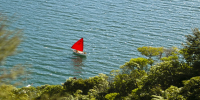

In [69]:
Image('resized_newzealand.png')

Text(0.5, 1.0, 'No Rotation')

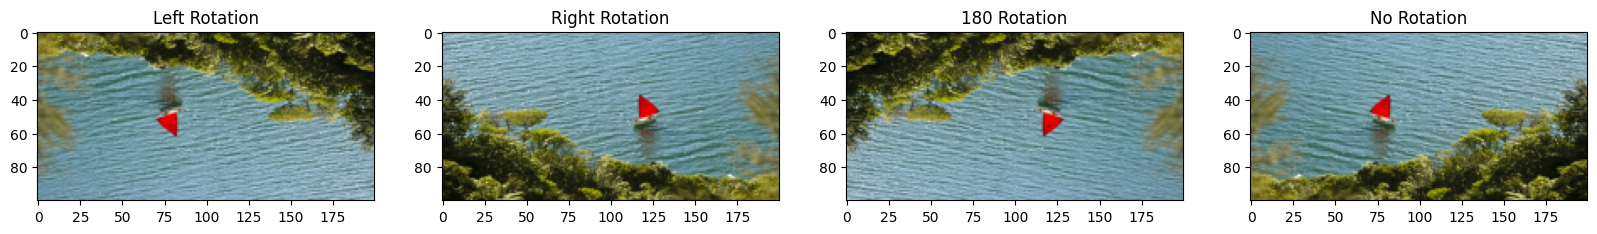

In [72]:
#Allright now move to Flipping the images
#We basically use flip() method to rotate the image
# It Accepts two arguments(src,rotation_axis) -> rotation_axis : 0,1,-1 -> left,right,
left_rotation = cv2.flip(resized_newzeland,0)
right_rotation = cv2.flip(resized_newzeland,1)
upside_down_rotation = cv2.flip(resized_newzeland,-1)

plt.figure(figsize=[20,5])

plt.subplot(141);plt.imshow(left_rotation);plt.title('Left Rotation')
plt.subplot(142);plt.imshow(right_rotation);plt.title('Right Rotation')
plt.subplot(143);plt.imshow(upside_down_rotation);plt.title('180 Rotation')
plt.subplot(144);plt.imshow(resized_newzeland);plt.title('No Rotation')